# Kaplan-Meier Plot

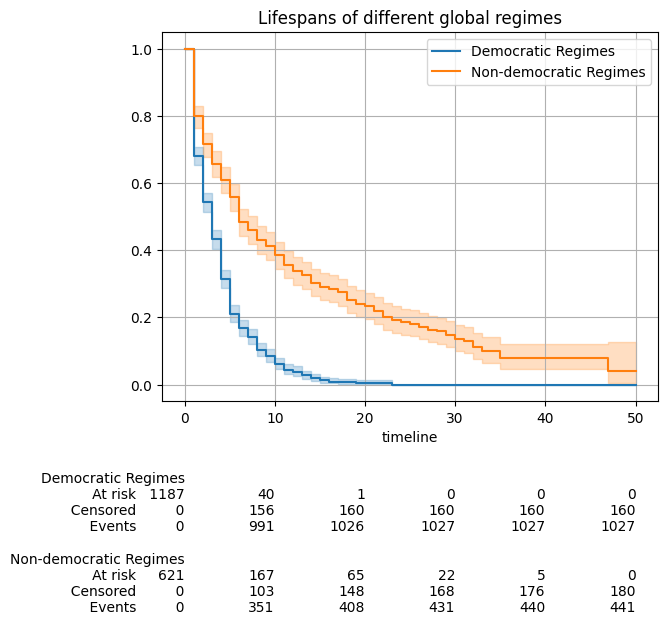

In [136]:
import matplotlib.pyplot as plt
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import numpy as np

data = load_dd()
T = data["duration"]
E = data["observed"]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)

ind_dem = data["democracy"] == "Democracy"

kmf1.fit(T[ind_dem], event_observed=E[ind_dem], timeline=t, label="Democratic Regimes")
kmf1.plot(ax=ax)

kmf2.fit(T[~ind_dem], event_observed=E[~ind_dem], timeline=t, label="Non-democratic Regimes")
kmf2.plot(ax=ax)

add_at_risk_counts(kmf1, kmf2, ax=ax, fontsize=10, rows_to_show=["At risk", "Censored", "Events"])

plt.title("Lifespans of different global regimes");

# Calculate statistical significance
from lifelines.statistics import logrank_test
log_rank_test_result = logrank_test(T[ind_fin], T[~ind_fin], event_observed_A=E[ind_fin], event_observed_B=E[~ind_fin])
p_value = log_rank_test_result.p_value

p_value_string = 'p < 0.0001' if p_value < 0.0001 else f'p = {p_value:.4f}'
ax.add_artist(AnchoredText(p_value_string, loc=3, frameon=False))

ax.yaxis.grid() # horizontal lines
ax.xaxis.grid()
# plt.tight_layout()
plt.show();



1    1027
0     160
Name: observed, dtype: int64
1    441
0    180
Name: observed, dtype: int64


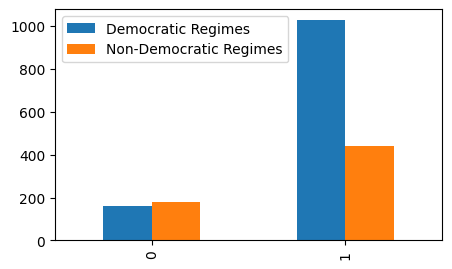

In [36]:
import pandas as pd
print(E[ind_dem].value_counts())
print(E[~ind_dem].value_counts())

# data[ind_dem]
labels = ["Democratic Regimes", "Non-Democratic Regimes"]
df = pd.DataFrame([(160, 180), (1027, 441)], index=[0, 1], columns=["Democratic Regimes","Non-Democratic Regimes", ])
df.plot.bar(figsize=(5, 3));

# Meta data on criminal recidivism data set

432 convicts who were released from Maryland state prisons in the 1970s and followed up for one year after release. Half the released convicts were assigned at random to an experimental treatment in which they were given financial aid, and the other half did not receive aid.

* week [duration]: of first arrest after release or censoring; all censored observations are censored at 52 weeks.
* arrest [event]:  1 if the released convict was rearrested and 0 otherwise
* fin: yes if the convict received financial aid and no if did not.
* age: The convict’s age in years at the time of release.
* race: The convict’s race, a factor with levels black and other.
* wexp: the convict’s full-time work experience prior to incarceration, a factor coded no or yes.
* mar: the convict’s marital status at the time of release, a factor coded married or not married.
* paro: whether or not the convict was released on parole, a factored coded no or yes.
* prio: the number of convictions prior to the current conviction.
* educ: level of education, coded numerically: 2 = 6th grade or less; 3 = 7th to 9th grade; 4 = 10th to 11th grade; 5 = 12th grade; and 6 = some college.
* emp1: employment status in the first week after release, a factor with levels no and yes



# Kaplan-Meier Plot Criminal Recidivism

In [37]:
from lifelines.datasets import load_rossi
from matplotlib.offsetbox import AnchoredText
rossi = load_rossi()

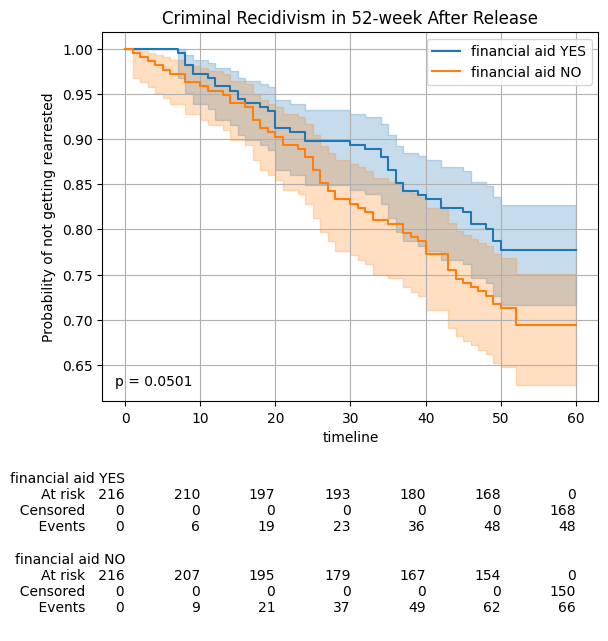

In [38]:
T = rossi["week"]
E = rossi["arrest"]
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
ax = plt.subplot(111)

t = np.linspace(0, 60, 61)

ind_fin = rossi["fin"] == 1

kmf1.fit(T[ind_fin], event_observed=E[ind_fin], timeline=t, label="financial aid YES")
kmf1.plot(ax=ax)

kmf2.fit(T[~ind_fin], event_observed=E[~ind_fin], timeline=t, label="financial aid NO")
kmf2.plot(ax=ax)

add_at_risk_counts(kmf1, kmf2, ax=ax, fontsize=10, rows_to_show=["At risk", "Censored", "Events"])

plt.title("Criminal Recidivism in 52-week After Release");

ax.set_ylabel("Probability of not getting rearrested");

from lifelines.statistics import logrank_test
log_rank_test_result = logrank_test(T[ind_fin], T[~ind_fin], event_observed_A=E[ind_fin], event_observed_B=E[~ind_fin])
p_value = log_rank_test_result.p_value

p_value_string = 'p < 0.0001' if p_value < 0.0001 else f'p = {p_value:.4f}'
ax.add_artist(AnchoredText(p_value_string, loc=3, frameon=False))

ax.yaxis.grid() # horizontal lines
ax.xaxis.grid()
# plt.tight_layout()
plt.show();

0    168
1     48
Name: arrest, dtype: int64
0    150
1     66
Name: arrest, dtype: int64


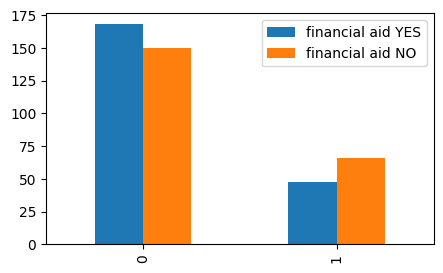

In [39]:
import pandas as pd
print(E[ind_fin].value_counts())
print(E[~ind_fin].value_counts())

labels = ["financial aid YES", "financial aid NO"]
df = pd.DataFrame([(168, 150), (48, 66)], index=[0, 1], columns=labels)
df.plot.bar(figsize=(5, 3));

# Cox Proportional Hazard Criminal Recidivism

In [40]:
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


## Interpretation of Cox Results

In [41]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi().drop('race', axis=1)

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.31
         time fit was run = 2023-04-23 10:30:21 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.37       0.69       0.19            -0.74             0.01                 0.48                 1.01
age        -0.06       0.95       0.02            -0.10            -0.01                 0.91                 0.99
wexp       -0.16       0.85       0.21            -0.57             0.26                 0.56                 1.30
mar        -0.47       0.62       0.38            -1.22             0.27                 0.30                 1.32
paro       -0.08       0.93       0.20            -0.46             0.30                 0.63                 1.36
prio        0.09       1.09       0.03             0.03             0.15                 1.03                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.91   0.06       4.17
age           0.00 -2.57   0.01       6.63
wexp          0.00 -0.74   0.46       1.12
mar           0.00 -1.24   0.22       2.22
paro          0.00 -0.40   0.69       0.54
prio          0.00  3.12 <0.005       9.13
---
Concordance = 0.64
Partial AIC = 1330.62
log-likelihood ratio test = 32.14 on 6 df
-log2(p) of ll-ratio test = 15.99

In [9]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi().drop('race', axis=1)
# rossi = rossi.assign(
#     age = lambda x: (x['age']-x['age'].mean())/x['age'].std(),
#     prio = lambda x: (x['prio']-x['prio'].mean())/x['prio'].std()
# )
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -659.31
         time fit was run = 2023-04-23 10:15:21 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.37       0.69       0.19            -0.74             0.01                 0.48                 1.01
age        -0.06       0.95       0.02            -0.10            -0.01                 0.91                 0.99
wexp       -0.16       0.85       0.21            -0.57             0.26                 0.56                 1.30
mar        -0.47       0.62       0.38            -1.22             0.27                 0.30                 1.32
paro       -0.08       0.93       0.20            -0.46             0.30                 0.63                 1.36
prio        0.09       1.09       0.03             0.03             0.15                 1.03                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.91   0.06       4.17
age           0.00 -2.57   0.01       6.63
wexp          0.00 -0.74   0.46       1.12
mar           0.00 -1.24   0.22       2.22
paro          0.00 -0.40   0.69       0.54
prio          0.00  3.12 <0.005       9.13
---
Concordance = 0.64
Partial AIC = 1330.62
log-likelihood ratio test = 32.14 on 6 df
-log2(p) of ll-ratio test = 15.99

In [10]:
print(rossi[rossi.fin.eq(0)].mar.value_counts())
print(rossi[rossi.fin.eq(1)].mar.value_counts())

0    187
1     29
Name: mar, dtype: int64
0    192
1     24
Name: mar, dtype: int64


In [11]:
print(rossi[rossi.fin.eq(0)].wexp.value_counts())
print(rossi[rossi.fin.eq(1)].wexp.value_counts())

1    123
0     93
Name: wexp, dtype: int64
1    124
0     92
Name: wexp, dtype: int64


In [12]:
print(rossi[rossi.fin.eq(0)].paro.value_counts())
print(rossi[rossi.fin.eq(1)].paro.value_counts())

1    135
0     81
Name: paro, dtype: int64
1    132
0     84
Name: paro, dtype: int64


In [13]:
print(rossi[rossi.fin.eq(0)].prio.value_counts().sort_index())
print(rossi[rossi.fin.eq(1)].prio.value_counts().sort_index())

0     19
1     54
2     48
3     37
4     19
5     12
6      6
7      4
8      6
9      1
10     3
11     2
12     1
13     1
14     1
18     2
Name: prio, dtype: int64
0     19
1     59
2     52
3     21
4     24
5     14
6      5
7      2
8      3
9      4
10     5
11     4
12     1
13     1
14     1
15     1
Name: prio, dtype: int64


<Axes: ylabel='Frequency'>

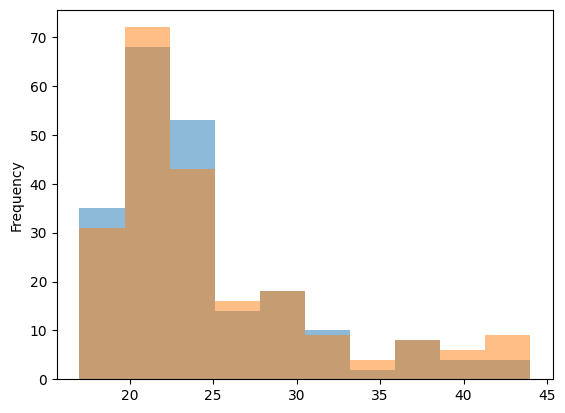

In [14]:
rossi[rossi.fin.eq(0)].age.plot.hist(bins=10, alpha=0.5)
rossi[rossi.fin.eq(1)].age.plot.hist(bins=10, alpha=0.5)


# Prediction using Criminal Recidivism

In [42]:
def train_test_split(df, test_size:float=0.25):
    msk = np.random.rand(len(df)) < test_size
    return (df[~msk], df[msk])

def scikit_lifeline_adapter(df:pd.DataFrame, duration='week'):
    """ Splits the data frame to input matrix and output vector suitable for lifeline sklearn adapter """
    df = df.copy(deep=True)
    X = df.drop(duration, axis=1)
    y = df.pop(duration)
    return (X, y)

In [43]:
train, test = train_test_split(rossi, test_size=0.20)

In [44]:
train, test = train.reset_index(), test.reset_index()

X_train, y_train = scikit_lifeline_adapter(train)
X_test, y_test = scikit_lifeline_adapter(test)

In [45]:
from lifelines.utils.sklearn_adapter import sklearn_adapter
CoxRegression = sklearn_adapter(
    CoxPHFitter,
    event_col='arrest',
)

In [46]:
cox_model = CoxRegression(n_baseline_knots=3)
cox_model.fit(X_train, y_train)
cox_model.lifelines_model.print_summary()
print('Training Score:', round(cox_model.score(X_train, y_train)*100, 2))
print('Test Score:',  round(cox_model.score(X_test, y_test)*100, 2))

<lifelines.CoxPHFitter: fitted with 335 total observations, 250 right-censored observations>
             duration col = 'duration_col'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 335
number of events observed = 85
   partial log-likelihood = -468.89
         time fit was run = 2023-04-23 10:30:48 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
index       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
fin        -0.45       0.64       0.23            -0.90            -0.00                 0.41                 1.00
age        -0.04       0.96       0.03            -0.09             0.01                 0.91                 1.01
wexp       -0.35       0.71       0.25            -0.83             0.14                 0.43                 1.15
mar        -0.43       0.65       0.41            -1.23             0.37                 0.29                 1.45
paro        0.00       1.00       0.23            -0.44             0.45                 0.64                 1.57
prio        0.09       1.09       0.03             0.02             0.16                 1.02                 1.17

            cmp to     z    p   -log2(p)
covariate                               
index         0.00  2.01 0.04       4.49
fin           0.00 -1.96 0.05       4.32
age           0.00 -1.60 0.11       3.18
wexp          0.00 -1.41 0.16       2.65
mar           0.00 -1.05 0.29       1.76
paro          0.00  0.02 0.99       0.02
prio          0.00  2.57 0.01       6.63
---
Concordance = 0.67
Partial AIC = 951.79
log-likelihood ratio test = 27.24 on 7 df
-log2(p) of ll-ratio test = 11.69

Training Score: 66.7
Test Score: 65.51


In [47]:
# cph = CoxPHFitter()
# cph.fit(train, duration_col='week', event_col='arrest')

# cph.print_summary()

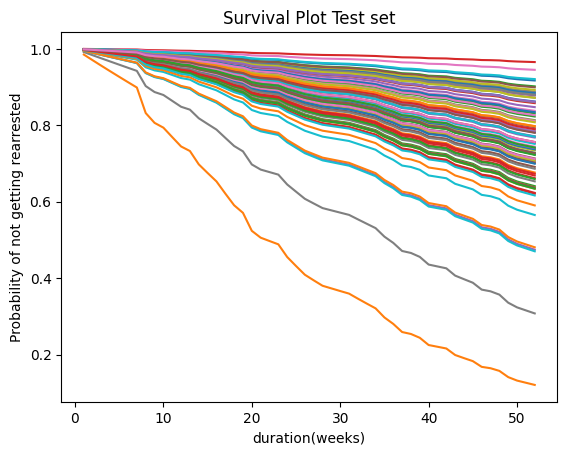

In [48]:
cph.predict_survival_function(test).plot();
plt.ylabel("Probability of not getting rearrested");
plt.xlabel("duration(weeks)");
plt.title('Survival Plot Test set')
plt.legend().remove()
# cph.score(test)

# Cross Validation

In [131]:
from lifelines.utils import k_fold_cross_validation
import numpy as np
results = []
for i in range(100):
    cph = CoxPHFitter()
    k_fold_cross_val = k_fold_cross_validation(
                                cph, 
                                train,
                                k=5,
                                duration_col='week',
                                event_col='arrest',
                                scoring_method="concordance_index"
    )
    cross_val_score = np.mean([round(_*100, 2) for _ in k_fold_cross_val])
    # print('kfold cross validation', cross_val_score )
    results.append(cross_val_score)

cross_val_preds = pd.DataFrame(results)

mean:  63.05, std:  1.25


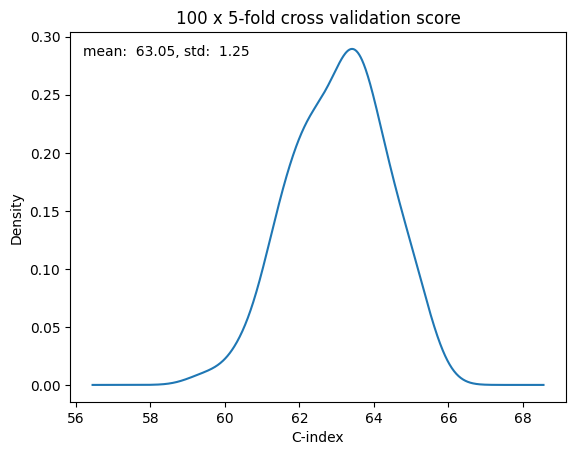

In [135]:
# np.mean(results), np.std(results)

# ax = plt.subplot(111)
mean, std = cross_val_preds.mean().values[0], cross_val_preds.std().values[0]
stats = f'mean: {mean: .2f}, std: {std: .2f}'
ax = cross_val_preds.plot.kde()
ax.add_artist(AnchoredText(stats, loc=2, frameon=False))
plt.xlabel('C-index');
plt.legend().remove()
plt.title('100 x 5-fold cross validation score');
print(stats)